<a href="https://colab.research.google.com/github/netragangurde/-Prepinsta/blob/main/Indian_Cars_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [7]:
cars = pd.read_csv('/content/cars_ds_final(1).csv')

In [8]:
cars.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
cars.shape ##This dataset has 1276 rows and 141 columns

(1276, 141)

In [10]:
cars.info(verbose=True) ## 6 float, 1 int and 134 obejct columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Unnamed: 0                                 int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Ex-Showroom_Price                          object 
 5    Displacement                               object 
 6    Cylinders                                  float64
 7    Valves_Per_Cylinder                        float64
 8    Drivetrain                                 object 
 9    Cylinder_Configuration                     object 
 10   Emission_Norm                              object 
 11   Engine_Location                            object 
 12   Fuel_System                                object 
 13   Fuel_Tank_Capacity             

In [11]:
cars.drop(columns=['Unnamed: 0'], axis=1, inplace = True)

Ex-showroom Price is our target column

In [12]:
## Converting the Ex-showroom_Price into numerical data
cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].str.replace('Rs.','').str.replace(',','')

<ipython-input-12-74a691ff4e58>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].str.replace('Rs.','').str.replace(',','')


In [13]:
cars['Ex-Showroom_Price'] = cars['Ex-Showroom_Price'].astype(int)

Creating a new column Name that will be combination of make+Model column

In [14]:
cars['Name'] = cars['Make'] +'-'+ cars['Model']

In [15]:
cars.drop(columns=['Make','Model'], axis=1,inplace=True)

DATA CLEANING

In [16]:
df = cars[['Name','Variant','Ex-Showroom_Price','Displacement','Seating_Capacity','Cylinders','Drivetrain','Emission_Norm','Fuel_System',
           'Fuel_Tank_Capacity','Fuel_Type','Height','Length','Width','Body_Type','City_Mileage','ARAI_Certified_Mileage',
           'Gears','Ground_Clearance','Front_Brakes','Power_Steering','Power_Seats',
           'Power','Torque','Speedometer','Odometer','Tripmeter','Seating_Capacity','Type','Wheelbase','Average_Fuel_Consumption',
           'Basic_Warranty','Bluetooth','Number_of_Airbags','USB_Compatibility','Engine_Type','USB_Ports','Battery','Navigation_System']]

In [17]:
df.dtypes

Name                         object
Variant                      object
Ex-Showroom_Price             int64
Displacement                 object
Seating_Capacity            float64
Cylinders                   float64
Drivetrain                   object
Emission_Norm                object
Fuel_System                  object
Fuel_Tank_Capacity           object
Fuel_Type                    object
Height                       object
Length                       object
Width                        object
Body_Type                    object
City_Mileage                 object
ARAI_Certified_Mileage       object
Gears                        object
Ground_Clearance             object
Front_Brakes                 object
Power_Steering               object
Power_Seats                  object
Power                        object
Torque                       object
Speedometer                  object
Odometer                     object
Tripmeter                    object
Seating_Capacity            

In [18]:
df.to_csv('new_Car',index=False)

In [19]:
df = pd.read_csv('new_Car')

Now we have 40 columns

In [20]:
## Removing cc from displacement column
df['Displacement']=df.Displacement.str.replace('cc','')

In [21]:
df.Fuel_Tank_Capacity.value_counts()

45 litres      125
35 litres      124
50 litres       94
60 litres       91
37 litres       79
              ... 
36 litres        1
90.5 litres      1
87 litres        1
72 litres        1
96 litres        1
Name: Fuel_Tank_Capacity, Length: 63, dtype: int64

In [22]:
df['Fuel_Tank_Capacity']=df.Fuel_Tank_Capacity.str.replace('litres','')

In [23]:
df.Fuel_Tank_Capacity = df.Fuel_Tank_Capacity.astype(float)

In [24]:
df['Height'] = df.Height.str.replace('mm','')

In [25]:
df['Height'].astype(float)

0       1652.0
1       1652.0
2       1652.0
3       1652.0
4       1652.0
         ...  
1271    1495.0
1272    1495.0
1273    1495.0
1274    1495.0
1275    1900.0
Name: Height, Length: 1276, dtype: float64

In [26]:
df['Length'] = df.Length.str.replace('mm','')
df['Length'].astype(float)

df['Width'] = df.Width.str.replace('mm','')
df['Width'].astype(float)

0       1750.0
1       1750.0
2       1750.0
3       1750.0
4       1750.0
         ...  
1271    1695.0
1272    1695.0
1273    1695.0
1274    1695.0
1275    1875.0
Name: Width, Length: 1276, dtype: float64

Power and Torque

In [27]:
df.Power.value_counts()

83PS@6000rpm           52
75PS@4000rpm           37
90PS@4000rpm           29
100PS@3750RPM          28
68PS@6000rpm           25
                       ..
248bhp@5200rpm          1
268PS@6350rpm           1
258bhp@5800-6100rpm     1
197hp@4500-6500rpm      1
202ps@3800rpm           1
Name: Power, Length: 372, dtype: int64

In [28]:
df.Torque.value_counts()

90Nm@3500rpm          42
200Nm@1750rpm         42
114Nm@4000rpm         27
350Nm@1750-2500rpm    26
104Nm@4000rpm         22
                      ..
280Nm@1350-4600rpm     1
400 Nm @ 1750 RPM      1
400NM@1550rpm          1
420Nm@1500-3000rpm     1
441Nm@2000rpm          1
Name: Torque, Length: 342, dtype: int64

In [29]:
## Removing unneccesary things using regular expression
df.Power = df['Power'].str.extract(r'(\d{1,4}).*').astype(int)

In [30]:
df.Torque = df['Torque'].str.extract(r'(\d{1,4}).*').astype(float)

In [31]:
df.Ground_Clearance = df['Ground_Clearance'].str.replace('mm','').astype(float)

In [32]:
df.dtypes

Name                         object
Variant                      object
Ex-Showroom_Price             int64
Displacement                 object
Seating_Capacity            float64
Cylinders                   float64
Drivetrain                   object
Emission_Norm                object
Fuel_System                  object
Fuel_Tank_Capacity          float64
Fuel_Type                    object
Height                       object
Length                       object
Width                        object
Body_Type                    object
City_Mileage                 object
ARAI_Certified_Mileage       object
Gears                        object
Ground_Clearance            float64
Front_Brakes                 object
Power_Steering               object
Power_Seats                  object
Power                         int64
Torque                      float64
Speedometer                  object
Odometer                     object
Tripmeter                    object
Seating_Capacity.1          

In [33]:
from sklearn.impute import SimpleImputer

Seperating cols into nnumerical and categorical

In [34]:
numerical_col = df.select_dtypes(include=['float64','int64','int32']).columns
categorical_col = df.select_dtypes(include=['object']).columns

In [35]:
num = SimpleImputer(strategy='median')
cat = SimpleImputer(strategy='most_frequent')

In [36]:
df[numerical_col] = num.fit_transform(df[numerical_col])
df[categorical_col] = cat.fit_transform(df[categorical_col])

In [37]:
df.isna().sum()

Name                        0
Variant                     0
Ex-Showroom_Price           0
Displacement                0
Seating_Capacity            0
Cylinders                   0
Drivetrain                  0
Emission_Norm               0
Fuel_System                 0
Fuel_Tank_Capacity          0
Fuel_Type                   0
Height                      0
Length                      0
Width                       0
Body_Type                   0
City_Mileage                0
ARAI_Certified_Mileage      0
Gears                       0
Ground_Clearance            0
Front_Brakes                0
Power_Steering              0
Power_Seats                 0
Power                       0
Torque                      0
Speedometer                 0
Odometer                    0
Tripmeter                   0
Seating_Capacity.1          0
Type                        0
Wheelbase                   0
Average_Fuel_Consumption    0
Basic_Warranty              0
Bluetooth                   0
Number_of_

# Data Visualization

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Univariate Analysis

Text(0.5, 1.0, 'Count of Ex-showroom Price')

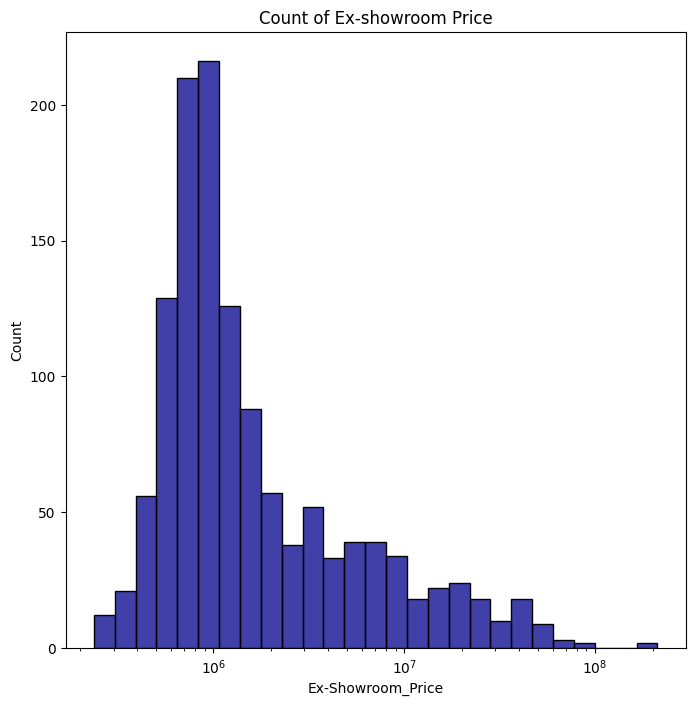

In [39]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='Ex-Showroom_Price',log_scale=True,color='darkblue')
plt.title('Count of Ex-showroom Price')

Text(0.5, 1.0, 'Most used Fuel Type')

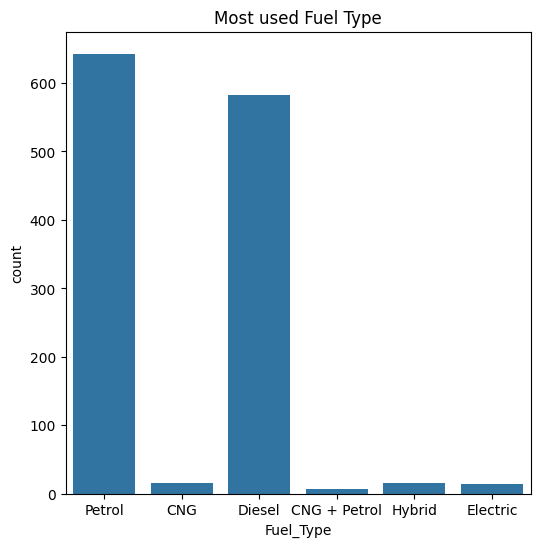

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Fuel_Type')
plt.title('Most used Fuel Type')

Petrol is the most used fuel type and CNG+Petrol is the least used

In [41]:
maker = df.Name.value_counts().head(10)

In [42]:
maker

Tata-Nexon              99
Mahindra-Kuv100 Nxt     22
Jeep-Compass            21
Mahindra-Xuv500         21
Honda-Amaze             20
Hyundai-Creta           18
Kia-Seltos              16
Toyota-Innova Crysta    16
Maruti Suzuki-Swift     14
Maruti Suzuki-Ciaz      14
Name: Name, dtype: int64

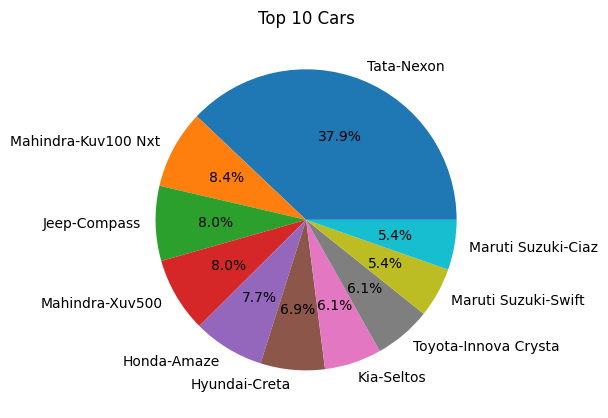

In [43]:
plt.figure(figsize=(6,6))
plt.pie(x=maker,labels=['Tata-Nexon','Mahindra-Kuv100 Nxt','Jeep-Compass','Mahindra-Xuv500',
'Honda-Amaze','Hyundai-Creta','Kia-Seltos','Toyota-Innova Crysta','Maruti Suzuki-Swift','Maruti Suzuki-Ciaz'],autopct='%1.1f%%')
plt.title('Top 10 Cars')
plt.tight_layout()

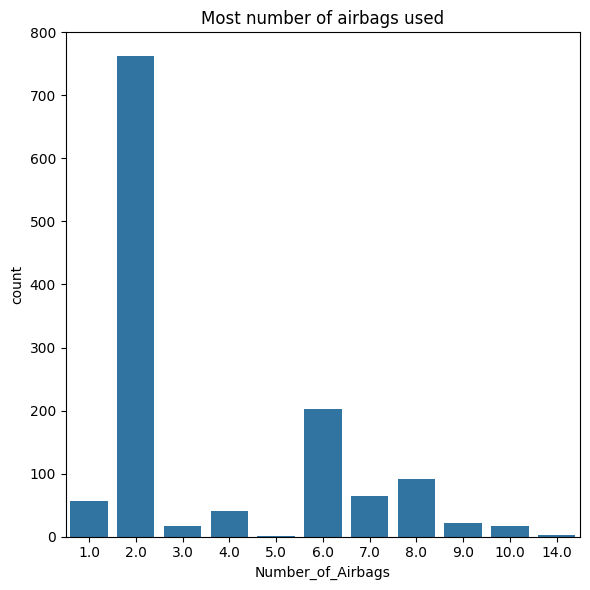

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Number_of_Airbags'])
plt.title('Most number of airbags used')
plt.tight_layout()

2 Number of airbags are mostly used

In [45]:
power = df.Power.value_counts().head(10)
power_label = df.Power.value_counts().head(10).index
torque = df.Torque.value_counts().head(10)
torque_label = df.Torque.value_counts().head(10).index

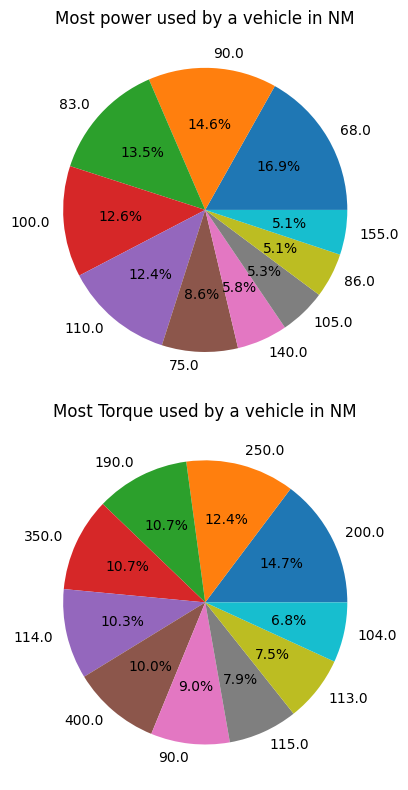

In [46]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.pie(x=power, labels= power_label, autopct='%1.1f%%')
plt.title('Most power used by a vehicle in NM')

plt.subplot(2,1,2)
plt.pie(x=torque, labels= torque_label, autopct='%1.1f%%')
plt.title('Most Torque used by a vehicle in NM')
plt.tight_layout()

Bivariate Analysis

In [47]:
corr = df.corr()

<ipython-input-47-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [48]:
corr

,Ex-Showroom_Price,Seating_Capacity,Cylinders,Fuel_Tank_Capacity,Ground_Clearance,Power,Torque,Seating_Capacity.1,Number_of_Airbags,USB_Ports
Ex-Showroom_Price,1.000000,-0.307150,0.817001,0.454805,-0.032621,0.855172,0.702153,-0.307150,0.335710,-0.209113
Seating_Capacity,-0.307150,1.000000,-0.313152,0.029613,0.257605,-0.326305,-0.141714,1.000000,-0.043493,0.072918
Cylinders,0.817001,-0.313152,1.000000,0.637512,-0.021425,0.880504,0.764419,-0.313152,0.448188,-0.089052
Fuel_Tank_Capacity,0.454805,0.029613,0.637512,1.000000,0.122058,0.662256,0.726607,0.029613,0.634343,0.041416
Ground_Clearance,-0.032621,0.257605,-0.021425,0.122058,1.000000,-0.020029,0.077282,0.257605,0.081411,0.010248
Power,0.855172,-0.326305,0.880504,0.662256,-0.020029,1.000000,0.854995,-0.326305,0.534421,-0.140767
Torque,0.702153,-0.141714,0.764419,0.726607,0.077282,0.854995,1.000000,-0.141714,0.600943,-0.062385
Seating_Capacity.1,-0.307150,1.000000,-0.313152,0.029613,0.257605,-0.326305,-0.141714,1.000000,-0.043493,0.072918
Number_of_Airbags,0.335710,-0.043493,0.448188,0.634343,0.081411,0.534421,0.600943,-0.043493,1.000000,0.042070
USB_Ports,-0.209113,0.072918,-0.089052,0.041416,0.010248,-0.140767,-0.062385,0.072918,0.042070,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

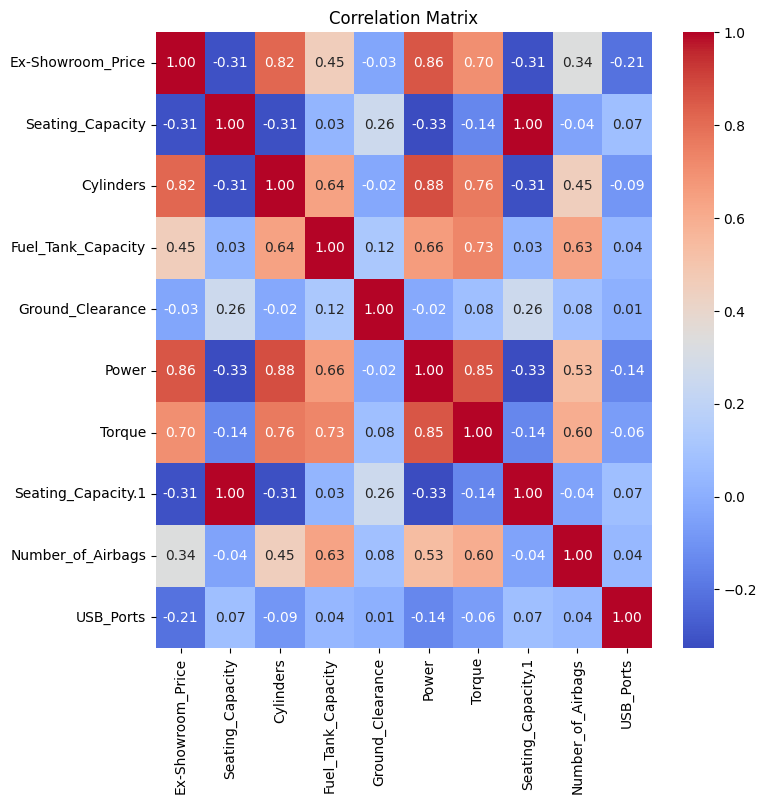

In [49]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

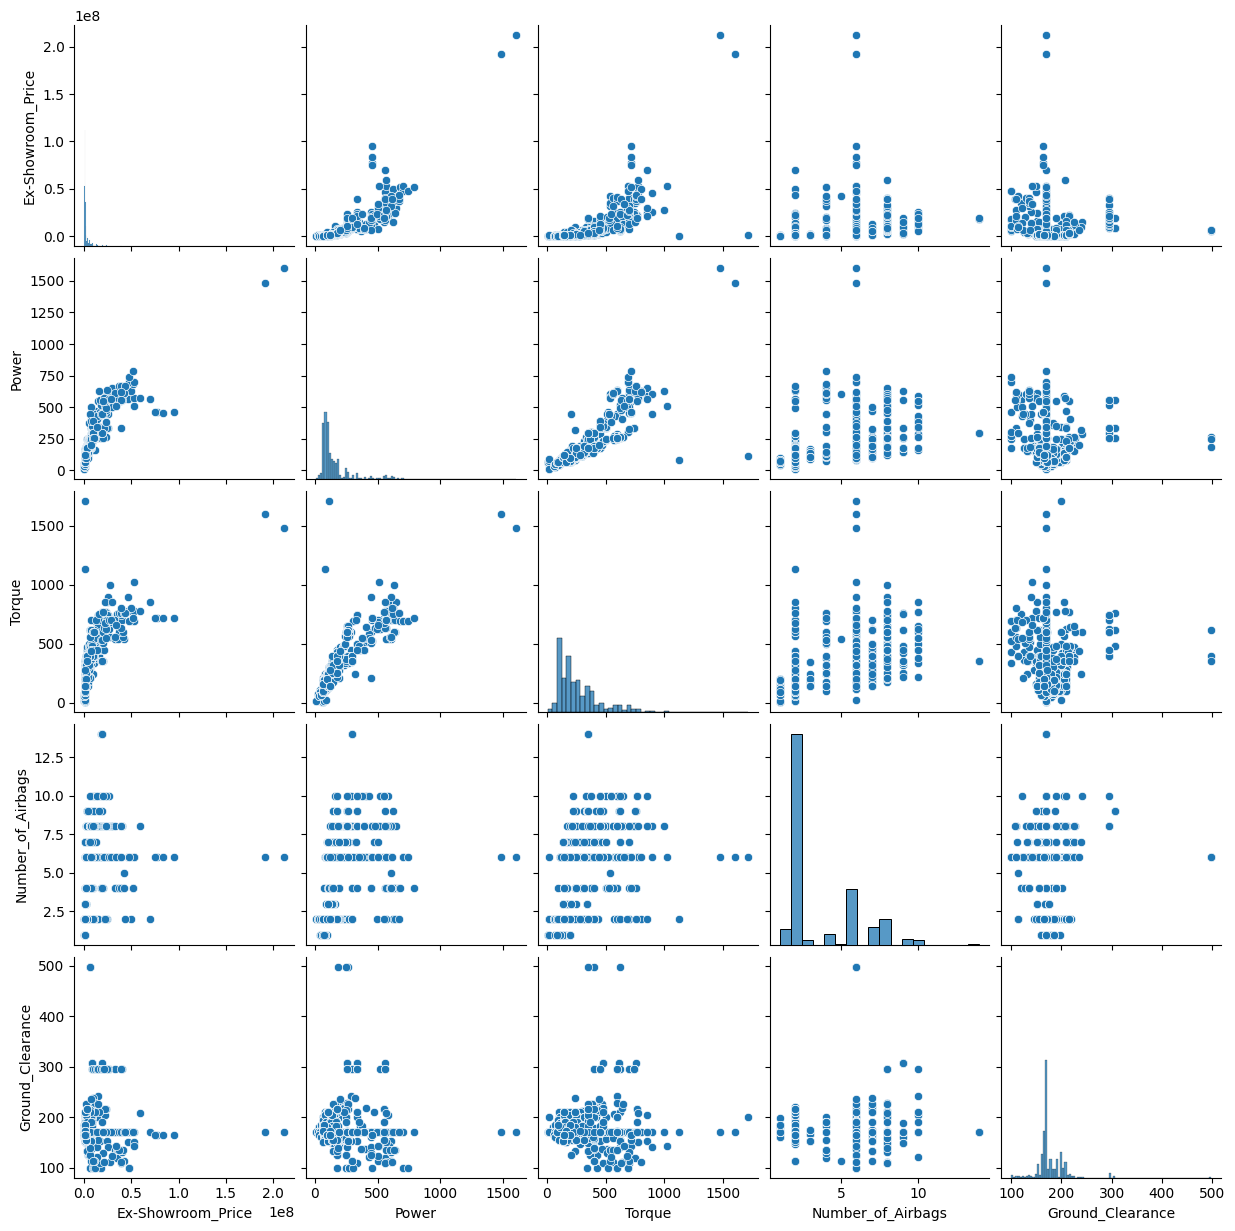

In [50]:
sns.pairplot(data=df[['Ex-Showroom_Price','Power','Torque','Number_of_Airbags','Ground_Clearance']])

Text(0.5, 1.0, 'Bar plot of Body Type wrt Price')

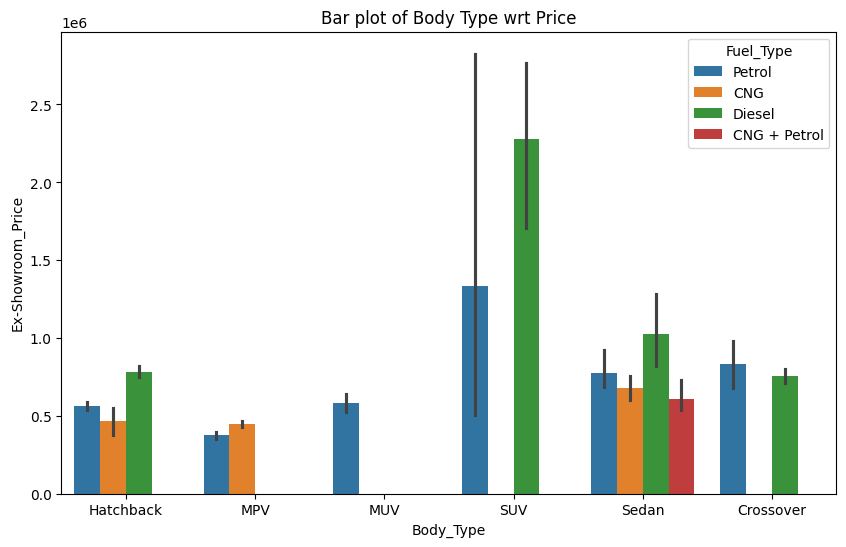

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(data=df.head(250), x='Body_Type', y='Ex-Showroom_Price', hue='Fuel_Type')
plt.title('Bar plot of Body Type wrt Price')

We can see Diesel cars have highest rate but available t some body type but petrol car is available to all of them

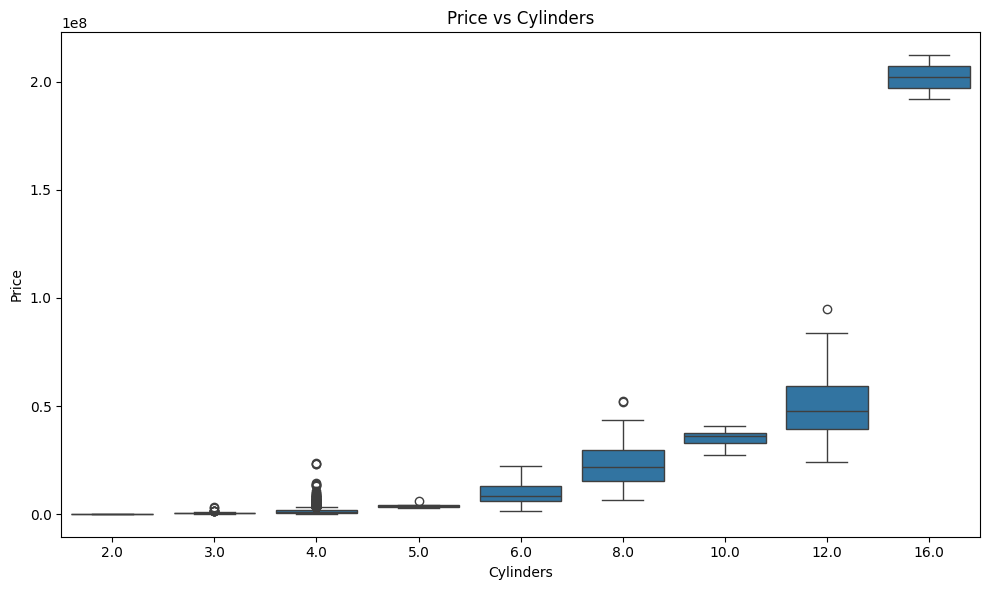

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cylinders', y='Ex-Showroom_Price', data=df)
plt.title('Price vs Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.tight_layout()

We can see some outliers and people usuallu buy 6 and 8 cylinder cars

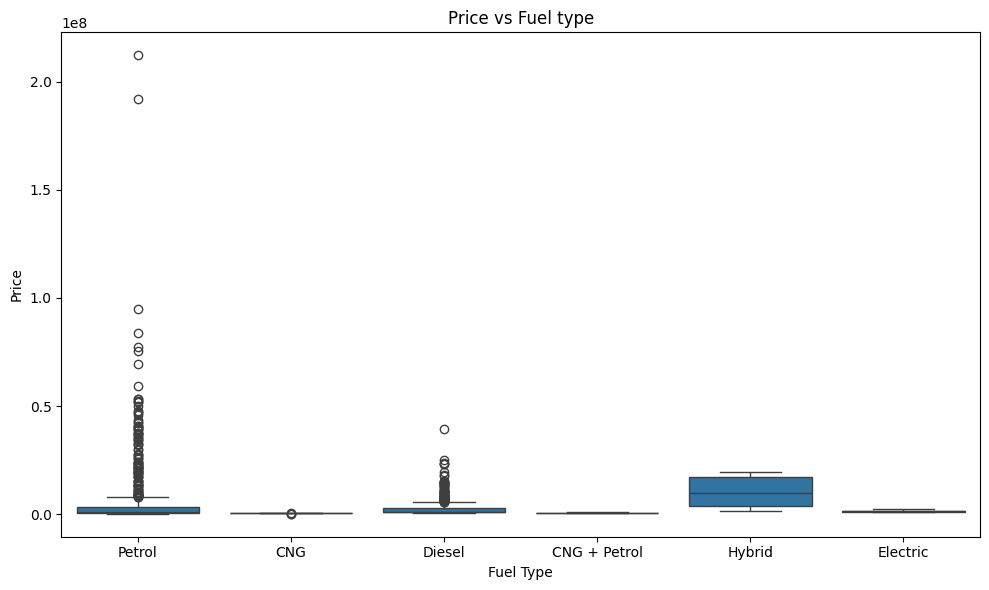

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Fuel_Type', y='Ex-Showroom_Price', data=df)
plt.title('Price vs Fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.tight_layout()